In [1]:
import os
### QAOA_realestate가 있는 폴더로 지정
dir_path = "/Users/minhyeong-gyu/Documents/GitHub/QuantumVariableSelection"
os.chdir(dir_path)
import sys
module_path = dir_path + "/Module"
if module_path not in sys.path:
    sys.path.append(module_path)

from optimizer import optimizer as opt
from optimizer import basefunctions as bf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
# 윈도우 한글 폰트
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

# Mac 한글 폰트
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
from dwave.system import LeapHybridCQMSampler
%matplotlib inline

In [27]:
data1 = pd.read_csv("./data/real_data/1. NMES1988.csv").iloc[:,1:]
y = data1['visits'].values
X = data1.loc[:,['nvisits', 'ovisits', 'novisits', 'emergency', 'hospital',"chronic","age","income","school"]].values
y_type = "linear"
lmbd = 0.01
n_features=5

In [14]:
sa_mi = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="mi")
sa_mi_result = sa_mi.optimize(X,y,lmbd,reps=10,n_features=n_features)
sa_full = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="full")
sa_full_result = sa_full.optimize(X,y,lmbd,reps=10,n_features=n_features)
sa_partial = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="partial")
sa_partial_result = sa_partial.optimize(X,y,lmbd,reps=10,n_features=n_features)
X_mi = X[:,sa_mi_result.astype(bool)]
X_full = X[:,sa_full_result.astype(bool)]
X_partial = X[:,sa_partial_result.astype(bool)]
datasets = [X,X_mi,X_full,X_partial]
rsquared_list = []
CN_list = []
for i in range(4) :
    dataset = datasets[i]
    rsquared_list += [bf.get_MSPE(dataset,y)]
    CN_list += [bf.get_CN(dataset)]
result = pd.DataFrame([rsquared_list,CN_list])
result.index = ["MSPE","CN"]
result.columns = ["Full","MIC","Ord R2","Partial R2"]
result1 = result
result

/Users/minhyeong-gyu/Documents/GitHub/QuantumVariableSelection/Module/optimizer/basefunctions.py:97: RuntimeWarning: invalid value encountered in reciprocal
  result = np.array(SSRP)**(-1)*SSRF


,Full,MIC,Ord R2,Partial R2
MSPE,0.237386,0.199649,0.237859,0.202875
CN,1.850417,1.792673,1.778375,1.296845


In [42]:
p = X.shape[1]
[format(i, '0'+str(p)+'b') for i in range(2**p)]

[['000000000'],
 ['000000001'],
 ['000000010'],
 ['000000011'],
 ['000000100'],
 ['000000101'],
 ['000000110'],
 ['000000111'],
 ['000001000'],
 ['000001001'],
 ['000001010'],
 ['000001011'],
 ['000001100'],
 ['000001101'],
 ['000001110'],
 ['000001111'],
 ['000010000'],
 ['000010001'],
 ['000010010'],
 ['000010011'],
 ['000010100'],
 ['000010101'],
 ['000010110'],
 ['000010111'],
 ['000011000'],
 ['000011001'],
 ['000011010'],
 ['000011011'],
 ['000011100'],
 ['000011101'],
 ['000011110'],
 ['000011111'],
 ['000100000'],
 ['000100001'],
 ['000100010'],
 ['000100011'],
 ['000100100'],
 ['000100101'],
 ['000100110'],
 ['000100111'],
 ['000101000'],
 ['000101001'],
 ['000101010'],
 ['000101011'],
 ['000101100'],
 ['000101101'],
 ['000101110'],
 ['000101111'],
 ['000110000'],
 ['000110001'],
 ['000110010'],
 ['000110011'],
 ['000110100'],
 ['000110101'],
 ['000110110'],
 ['000110111'],
 ['000111000'],
 ['000111001'],
 ['000111010'],
 ['000111011'],
 ['000111100'],
 ['000111101'],
 ['00011

In [15]:
data2 = pd.read_csv("./data/real_data/2. CASchools.csv").iloc[:,1:]
y = data2["expenditure"].values
X = data2.loc[:,["students","calworks","lunch","computer","income","english","read","math"]].values
lmbd = 0.01
n_features=5

In [16]:
sa_mi = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="mi")
sa_mi_result = sa_mi.optimize(X,y,lmbd,reps=10,n_features=n_features)
sa_full = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="full")
sa_full_result = sa_full.optimize(X,y,lmbd,reps=10,n_features=n_features)
sa_partial = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="partial")
sa_partial_result = sa_partial.optimize(X,y,lmbd,reps=10,n_features=n_features)
X_mi = X[:,sa_mi_result.astype(bool)]
X_full = X[:,sa_full_result.astype(bool)]
X_partial = X[:,sa_partial_result.astype(bool)]
datasets = [X,X_mi,X_full,X_partial]
rsquared_list = []
CN_list = []
for i in range(4) :
    dataset = datasets[i]
    rsquared_list += [bf.get_MSPE(dataset,y)]
    CN_list += [bf.get_CN(dataset)]
result = pd.DataFrame([rsquared_list,CN_list])
result.index = ["MSPE","CN"]
result.columns = ["Full","MIC","Ord R2","Partial R2"]
result2 = result
result

,Full,MIC,Ord R2,Partial R2
MSPE,56.211540,62.131698,61.219257,61.605475
CN,8.861036,4.234118,6.188206,5.607543


In [17]:
data3 = pd.read_csv("./data/real_data/3. Guns.csv").iloc[:,1:]
data3["law"] = np.array(data3["law"]=="yes")*1
y = data3['violent'].values
X = data3.loc[:,[ 'murder', 'robbery', 'prisoners', 'afam', 'cauc',
       'male', 'population', 'income', 'density',"law"]].values
lmbd = 0.01
n_features=5

In [18]:
sa_mi = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="mi")
sa_mi_result = sa_mi.optimize(X,y,lmbd,reps=10,n_features=n_features)
sa_full = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="full")
sa_full_result = sa_full.optimize(X,y,lmbd,reps=10,n_features=n_features)
sa_partial = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="partial")
sa_partial_result = sa_partial.optimize(X,y,lmbd,reps=10,n_features=n_features)
X_mi = X[:,sa_mi_result.astype(bool)]
X_full = X[:,sa_full_result.astype(bool)]
X_partial = X[:,sa_partial_result.astype(bool)]
datasets = [X,X_mi,X_full,X_partial]
rsquared_list = []
CN_list = []
for i in range(4) :
    dataset = datasets[i]
    rsquared_list += [bf.get_MSPE(dataset,y)]
    CN_list += [bf.get_CN(dataset)]
result = pd.DataFrame([rsquared_list,CN_list])
result.index = ["MSPE","CN"]
result.columns = ["Full","MIC","Ord R2","Partial R2"]
result3 = result
result

,Full,MIC,Ord R2,Partial R2
MSPE,7.009552,8.146794,6.040275,6.592916
CN,19.678433,14.304242,4.594683,4.293022


In [19]:
data4 = pd.read_csv("./data/real_data/4. MASchools.csv").iloc[:,1:]
data4 = data4.loc[:,[ 'expreg', 'expspecial', 'expbil', 'expocc',
       'exptot', 'scratio', 'special', 'lunch', 'stratio','score4', 'income','english']].dropna()
y = data4['income'].values
X = data4.loc[:,[ 'expreg', 'expspecial', 'expbil', 'expocc',
       'exptot', 'scratio', 'special', 'lunch', 'stratio','english']].dropna().values
lmbd = 0.01
n_features = 5

In [20]:
sa_mi = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="mi")
sa_mi_result = sa_mi.optimize(X,y,lmbd,reps=10,n_features=n_features)
sa_full = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="full")
sa_full_result = sa_full.optimize(X,y,lmbd,reps=10,n_features=n_features)
sa_partial = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="partial")
sa_partial_result = sa_partial.optimize(X,y,lmbd,reps=10,n_features=n_features)
X_mi = X[:,sa_mi_result.astype(bool)]
X_full = X[:,sa_full_result.astype(bool)]
X_partial = X[:,sa_partial_result.astype(bool)]
datasets = [X,X_mi,X_full,X_partial]
rsquared_list = []
CN_list = []
for i in range(4) :
    dataset = datasets[i]
    rsquared_list += [bf.get_cv_r2(dataset,y)]
    CN_list += [bf.get_CN(dataset)]
result = pd.DataFrame([rsquared_list,CN_list])
result.index = ["R_Squared","CN"]
result.columns = ["Full","MIC","Ord R2","Partial R2"]
result4 = result
result

,Full,MIC,Ord R2,Partial R2
R_Squared,0.274678,0.318231,0.260605,0.244967
CN,9.575417,8.688521,8.237363,2.022525


In [21]:
data5 = pd.read_csv("./data/real_data/5. Mortgage.csv").iloc[:,1:]
data5["married"] = np.array(data5["married"]=="yes")*1
data5["first"] = np.array(data5["first"]=="yes")*1
data5["selfemp"] = np.array(data5["selfemp"]=="yes")*1
data5["coborrower"] = np.array(data5["coborrower"]=="yes")*1
y = data5['liability'].values
X = data5.loc[:,[ 'age', 'school', 'networth', 'interest', 'points', 'maturities',
       'years',   'tdiff', 'margin', 'liquid']].dropna().values
lmbd = 0.01
n_features = 5

In [22]:
sa_mi = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="mi")
sa_mi_result = sa_mi.optimize(X,y,lmbd,reps=10,n_features=n_features)
sa_full = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="full")
sa_full_result = sa_full.optimize(X,y,lmbd,reps=10,n_features=n_features)
sa_partial = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="partial")
sa_partial_result = sa_partial.optimize(X,y,lmbd,reps=10,n_features=n_features)
X_mi = X[:,sa_mi_result.astype(bool)]
X_full = X[:,sa_full_result.astype(bool)]
X_partial = X[:,sa_partial_result.astype(bool)]
datasets = [X,X_mi,X_full,X_partial]
rsquared_list = []
CN_list = []
for i in range(4) :
    dataset = datasets[i]
    rsquared_list += [bf.get_MSPE(dataset,y)]
    CN_list += [bf.get_CN(dataset)]
result = pd.DataFrame([rsquared_list,CN_list])
result.index = ["MSPE","CN"]
result.columns = ["Full","MIC","Ord R2","Partial R2"]
result5 = result
result

,Full,MIC,Ord R2,Partial R2
MSPE,2.844828,3.566733,2.461495,2.173795
CN,3.110316,1.828956,2.223078,1.710029


In [23]:
r2_list = [] 
cn_list = []
for i in range(5):
    r2_list += (eval("result"+str(i+1))).iloc[0,:].tolist()
    cn_list += (eval("result"+str(i+1))).iloc[1,:].tolist()

In [24]:
result_plot = pd.DataFrame([["dataset"+str(j+1) for j in range(5) for i in range(4)],np.array([["Full","MIC","Ord R2","Partial R2"] for j in range(5)]).flatten().tolist(),r2_list,cn_list]).T
result_plot.columns = ["Dataset","Measure","MSPE","CN"]

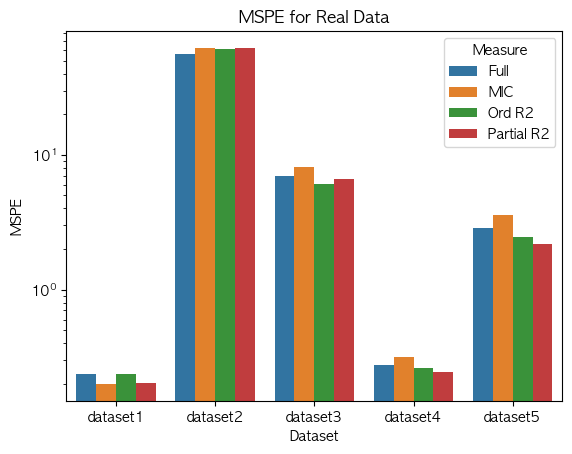

In [25]:
sns.barplot(x="Dataset",y="MSPE",hue="Measure",data=result_plot)
plt.title("MSPE for Real Data")
plt.yscale("log")
plt.show()


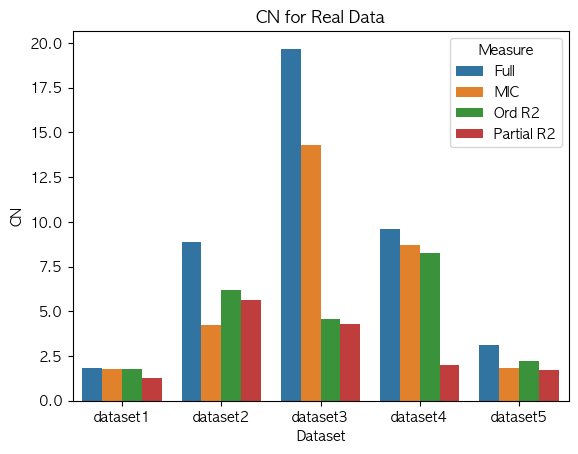

In [26]:
sns.barplot(x="Dataset",y="CN",hue="Measure",data=result_plot)
plt.title("CN for Real Data")
plt.show()